# Statistics Learning Midterm Project
---
R11323024
樊惟祐
---

## 1. Data Preprocessing

In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
raw_data = pd.read_csv('data/alzheimers_disease_data.csv')
raw_data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [20]:
# check for missing values
raw_data.isnull().sum().sort_values(ascending=False).head(10)

PatientID                   0
BehavioralProblems          0
CholesterolLDL              0
CholesterolHDL              0
CholesterolTriglycerides    0
MMSE                        0
FunctionalAssessment        0
MemoryComplaints            0
ADL                         0
DiastolicBP                 0
dtype: int64

In [21]:
# check for data types and basic statistics
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [28]:
# check for duplicates
raw_data['PatientID'].duplicated().sum()

0

In [68]:
stats = raw_data.describe(include='all')
print(stats)

          PatientID          Age  Gender  Ethnicity  EducationLevel  \
count   2149.000000  2149.000000  2149.0     2149.0          2149.0   
unique          NaN          NaN     2.0        4.0             4.0   
top             NaN          NaN     1.0        0.0             1.0   
freq            NaN          NaN  1088.0     1278.0           854.0   
mean    5825.000000    74.908795     NaN        NaN             NaN   
std      620.507185     8.990221     NaN        NaN             NaN   
min     4751.000000    60.000000     NaN        NaN             NaN   
25%     5288.000000    67.000000     NaN        NaN             NaN   
50%     5825.000000    75.000000     NaN        NaN             NaN   
75%     6362.000000    83.000000     NaN        NaN             NaN   
max     6899.000000    90.000000     NaN        NaN             NaN   

                BMI  Smoking  AlcoholConsumption  PhysicalActivity  \
count   2149.000000   2149.0         2149.000000       2149.000000   
unique 

In [ ]:
# Map Ethnicity and EducationLevel to meaningful names
ethnicity_mapping = {0: 'Caucasian', 1: 'AfricanAmerican', 2: 'Asian', 3: 'Other'}
education_mapping = {0: 'None', 1: 'HighSchool', 2: 'Bachelors', 3: 'Higher'}

# Replace the numerical values with meaningful names
raw_data['Ethnicity'] = raw_data['Ethnicity'].map(ethnicity_mapping)
raw_data['EducationLevel'] = raw_data['EducationLevel'].map(education_mapping)

# One-hot encode the columns with meaningful names
raw_data = pd.get_dummies(raw_data, columns=['Ethnicity', 'EducationLevel'], drop_first=True)

# Display the first few rows to verify the new column names
print(raw_data.head())

   PatientID  Age  Gender        BMI  Smoking  AlcoholConsumption  \
0       4751   73       0  22.927749        0           13.297218   
1       4752   89       0  26.827681        0            4.542524   
2       4753   73       0  17.795882        0           19.555085   
3       4754   74       1  33.800817        1           12.209266   
4       4755   89       0  20.716974        0           18.454356   

   PhysicalActivity  DietQuality  SleepQuality  FamilyHistoryAlzheimers  ...  \
0          6.327112     1.347214      9.025679                        0  ...   
1          7.619885     0.518767      7.151293                        0  ...   
2          7.844988     1.826335      9.673574                        1  ...   
3          8.428001     7.435604      8.392554                        0  ...   
4          6.310461     0.795498      5.597238                        0  ...   

   DifficultyCompletingTasks  Forgetfulness  Diagnosis  DoctorInCharge  \
0                          1  

In [98]:
raw_data = raw_data.drop(columns=['PatientID', 'DoctorInCharge'])

In [ ]:
# List all binary columns (0/1) in the dataset
binary_columns = [
    'Gender', 
    'Smoking', 
    'FamilyHistoryAlzheimers',
    'CardiovascularDisease', 
    'Diabetes', 
    'Depression',
    'HeadInjury', 
    'Hypertension', 
    'MemoryComplaints',
    'BehavioralProblems', 
    'Confusion', 
    'Disorientation',
    'PersonalityChanges', 
    'DifficultyCompletingTasks', 
    'Forgetfulness',
    'Diagnosis'
]

# Convert each binary column to boolean type
raw_data[binary_columns] = raw_data[binary_columns].astype(bool)
# Display statistics for the binary columns

In [117]:
binary_stats = raw_data[binary_columns].describe()
print(binary_stats)

       Gender Smoking FamilyHistoryAlzheimers CardiovascularDisease Diabetes  \
count    2149    2149                    2149                  2149     2149   
unique      2       2                       2                     2        2   
top      True   False                   False                 False    False   
freq     1088    1529                    1607                  1839     1825   

       Depression HeadInjury Hypertension MemoryComplaints BehavioralProblems  \
count        2149       2149         2149             2149               2149   
unique          2          2            2                2                  2   
top         False      False        False            False              False   
freq         1718       1950         1829             1702               1812   

       Confusion Disorientation PersonalityChanges DifficultyCompletingTasks  \
count       2149           2149               2149                      2149   
unique         2              2  

In [100]:
# Identify continuous columns that may need scaling
continous_columns = ['SystolicBP', 'DiastolicBP', 'CholesterolTotal', 
                         'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
                           'Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
                             'SleepQuality', 'MMSE', 'FunctionalAssessment', 'ADL']

# Scale the continuous columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
raw_data[continous_columns] = scaler.fit_transform(raw_data[continous_columns])

Diagnosis distribution:
Diagnosis
False    1389
True      760
Name: count, dtype: int64


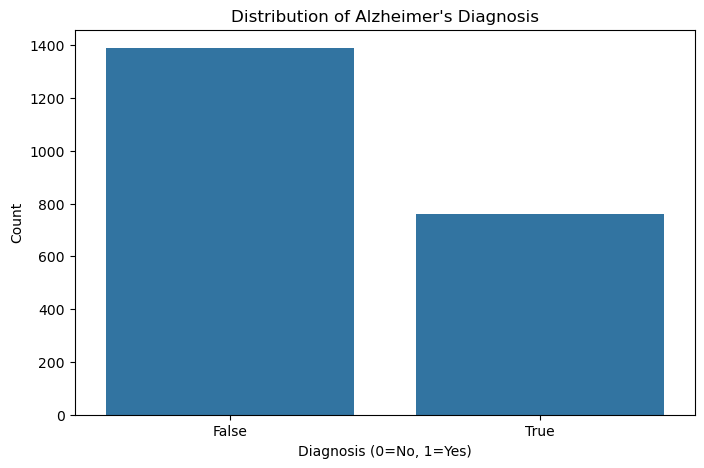

In [101]:
# Check if the diagnosis classes are balanced
diagnosis_counts = raw_data['Diagnosis'].value_counts()
print("Diagnosis distribution:")
print(diagnosis_counts)

# Visualize class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Diagnosis', data=raw_data)
plt.title('Distribution of Alzheimer\'s Diagnosis')
plt.xlabel('Diagnosis (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

Top correlations with Alzheimer's diagnosis:
Diagnosis                    1.000000
MemoryComplaints             0.306742
BehavioralProblems           0.224350
CholesterolHDL               0.042584
EducationLevel_None          0.039049
Ethnicity_Asian              0.036854
Hypertension                 0.035080
CardiovascularDisease        0.031490
BMI                          0.026343
CholesterolTriglycerides     0.022672
Ethnicity_Caucasian          0.021870
DifficultyCompletingTasks    0.009069
DietQuality                  0.008506
CholesterolTotal             0.006394
PhysicalActivity             0.005945
DiastolicBP                  0.005293
EducationLevel_HighSchool   -0.000039
Forgetfulness               -0.000354
Smoking                     -0.004865
Age                         -0.005488
Depression                  -0.005893
AlcoholConsumption          -0.007618
SystolicBP                  -0.015615
Confusion                   -0.019186
PersonalityChanges          -0.020627
Gende

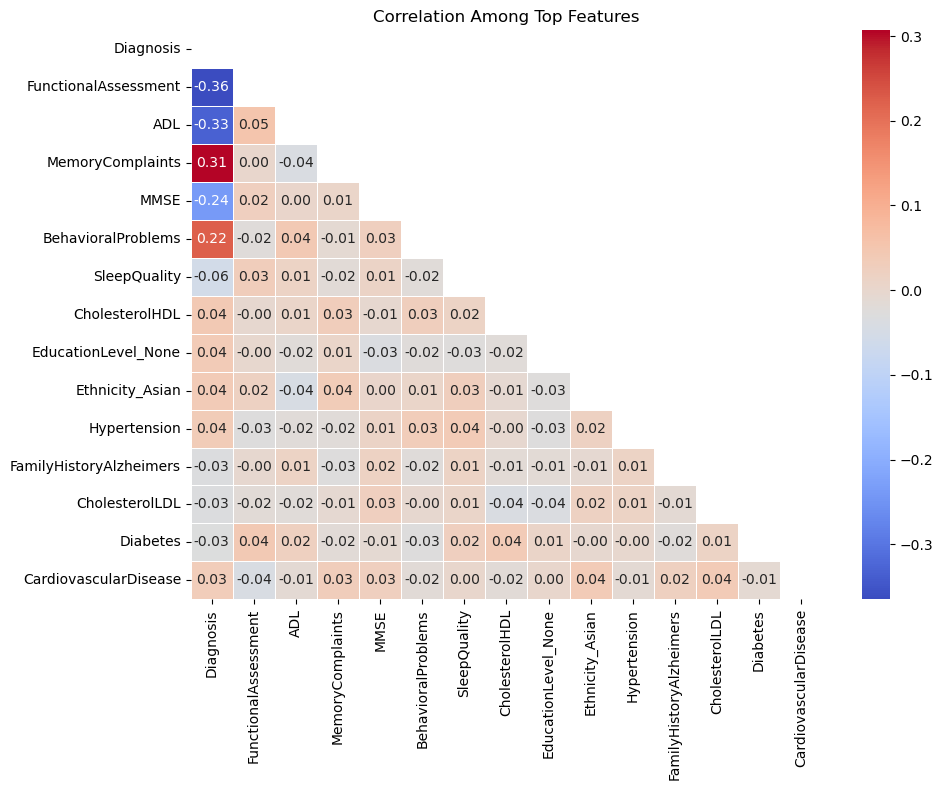

In [110]:
# Calculate correlation with target variable
corr_with_target = raw_data.corr(numeric_only=False)['Diagnosis'].sort_values(ascending=False)
print("Top correlations with Alzheimer's diagnosis:")
print(corr_with_target)

# Visualize top correlations
plt.figure(figsize=(10, 8))
top_features = corr_with_target.abs().sort_values(ascending=False)[:15].index
sns.heatmap(raw_data[top_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', mask=np.triu(np.ones_like(raw_data[top_features].corr(), dtype=bool)))
plt.title('Correlation Among Top Features')
plt.tight_layout()
plt.show()

<Figure size 2000x1500 with 0 Axes>

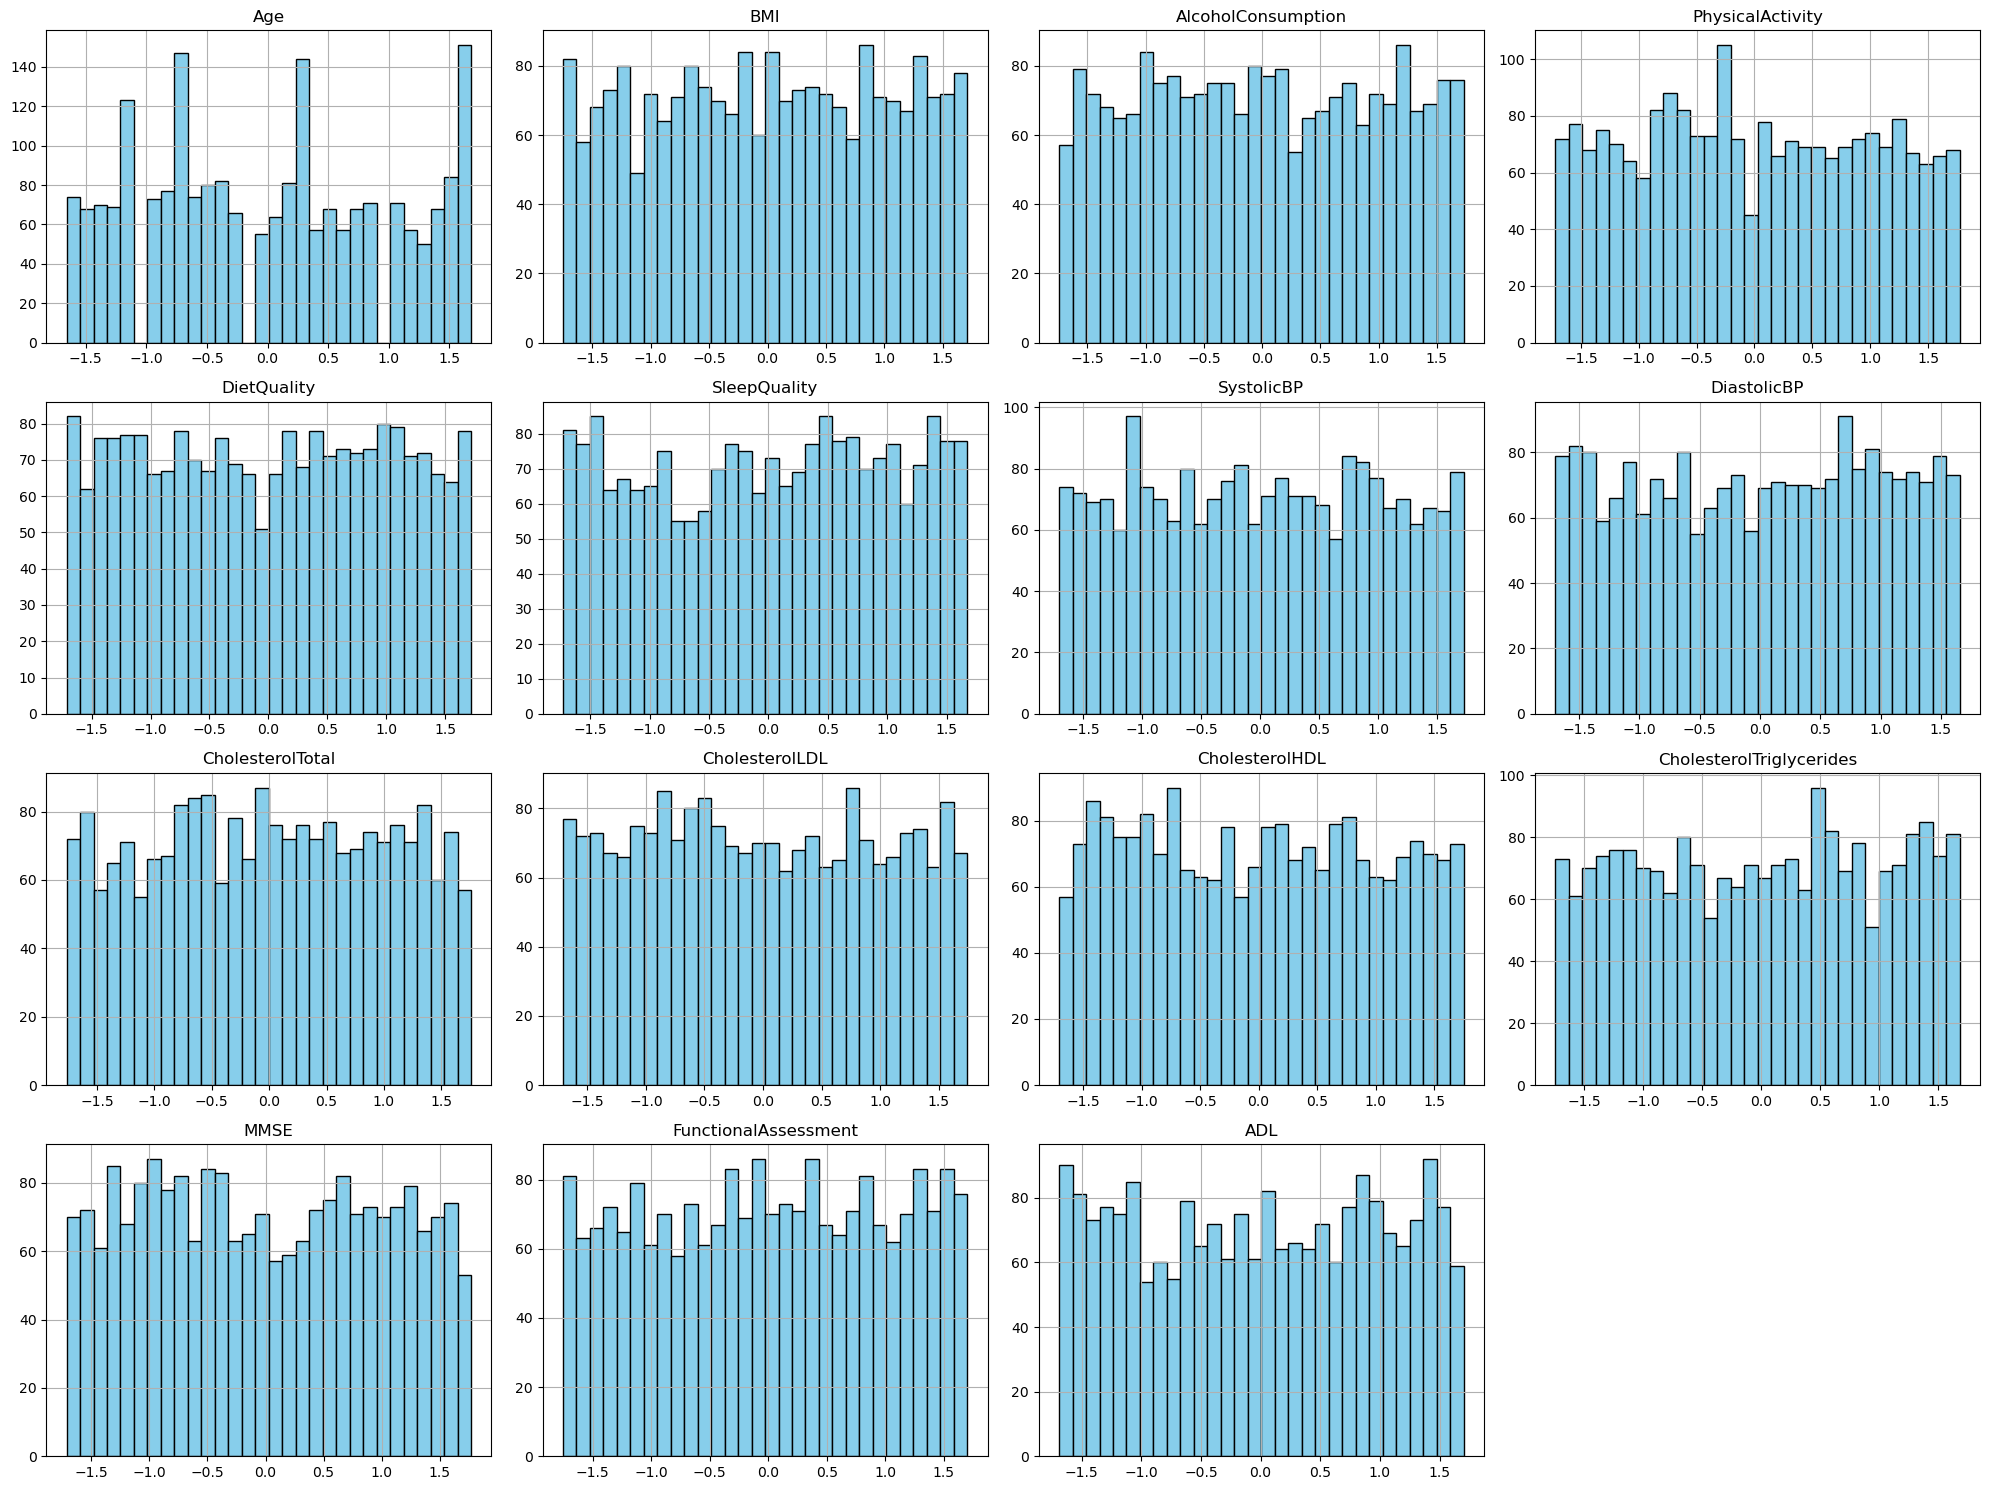

In [111]:
# Visualize distributions of numerical columns
plt.figure(figsize=(20, 15))
raw_data.hist(bins=30, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

## Training

### Train Test split

In [157]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Split data
X = raw_data.drop('Diagnosis', axis=1)
y = raw_data['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [ ]:
log_reg = LogisticRegression()

param_grid = [    
    {'penalty' : ['l2'],
    'C' : np.logspace(-2, 3, 100),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000, 2500, 5000]
    }
]

clf = GridSearchCV(log_reg, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1, scoring='accuracy')
clf.fit(X_train, y_train)
best_logit = clf.best_estimator_
clf.best_params_

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


{'C': 5.336699231206307,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [187]:
print("Logistic Regression Report:")
print(classification_report(y_test, best_logit.predict(X_test), digits=3))

Logistic Regression Report:
              precision    recall  f1-score   support

       False      0.846     0.895     0.870       277
        True      0.788     0.706     0.745       153

    accuracy                          0.828       430
   macro avg      0.817     0.801     0.808       430
weighted avg      0.826     0.828     0.826       430



In [190]:
# Get the coefficients of the logistic regression model
coefficients = best_logit.coef_

# Get the feature names
feature_names = X_train.columns

# Combine feature names with their corresponding coefficients
logit_coeff = pd.DataFrame(coefficients.T, index=feature_names, columns=['Coefficient'])
logit_coeff['AbsCoefficient'] = logit_coeff['Coefficient'].abs()

logit_coeff = logit_coeff.sort_values(by='AbsCoefficient', ascending=False)
logit_coeff['Coefficient']

MemoryComplaints             2.643020
BehavioralProblems           2.381890
FunctionalAssessment        -1.373006
ADL                         -1.288545
MMSE                        -0.876629
EducationLevel_Higher       -0.419757
Ethnicity_Asian              0.367150
HeadInjury                  -0.354129
Smoking                     -0.235212
Diabetes                     0.212832
Depression                   0.205718
Ethnicity_Caucasian          0.198928
EducationLevel_None          0.196670
Confusion                   -0.186735
Hypertension                 0.165792
PersonalityChanges          -0.136321
CholesterolHDL               0.124616
Age                         -0.117136
EducationLevel_HighSchool   -0.117117
Gender                       0.114859
FamilyHistoryAlzheimers     -0.106666
DiastolicBP                  0.097196
SleepQuality                -0.095489
CholesterolTriglycerides     0.094962
Forgetfulness                0.094153
PhysicalActivity            -0.092325
DietQuality 

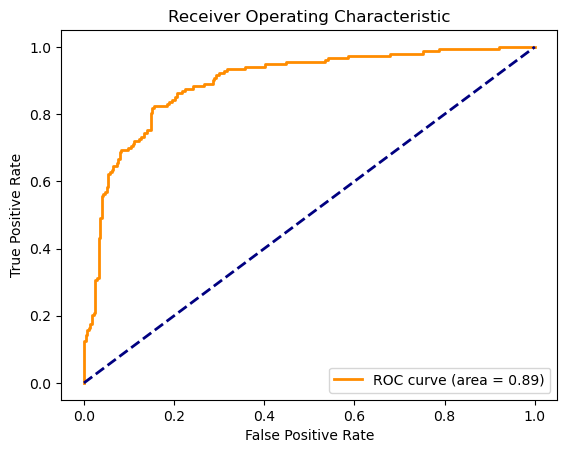

In [191]:
from sklearn.metrics import roc_curve, auc

# Plot ROC Curve
y_pred_prob = best_logit.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Random Forest

In [ ]:
# Random Forest
rf = RandomForestClassifier()
# grid search for hyperparameter tuning
param_grid = {
    'n_estimators': np.arange(10, 200, 10),
    'max_depth': [None, 10, 15, 20, 25, 30],
    'min_samples_split': np.arange(5, 50, 10)
}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)    
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
print("Best parameters for Random Forest:")
grid_search.best_params_

Best parameters for Random Forest:


{'max_depth': None, 'min_samples_split': 45, 'n_estimators': 130}

In [192]:
print("Random Forest Report:")
print(classification_report(y_test, best_rf.predict(X_test), digits=3))

Random Forest Report:
              precision    recall  f1-score   support

       False      0.892     0.982     0.935       277
        True      0.960     0.784     0.863       153

    accuracy                          0.912       430
   macro avg      0.926     0.883     0.899       430
weighted avg      0.916     0.912     0.909       430



<Figure size 1000x600 with 0 Axes>

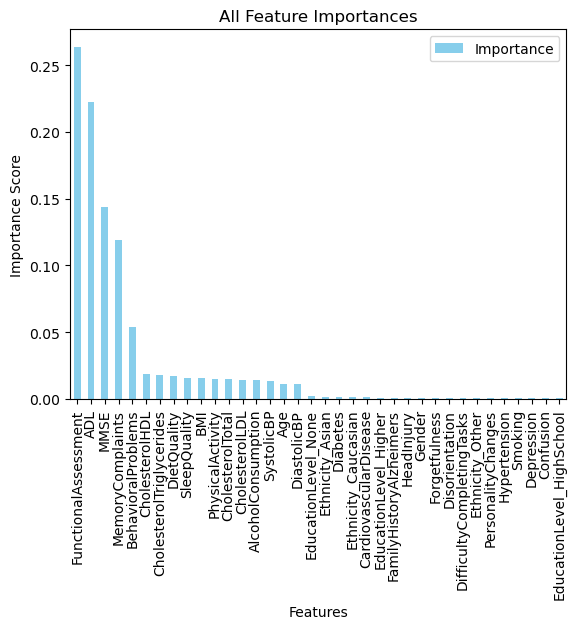

In [195]:
# Access the feature importances
feature_importance = pd.DataFrame(best_rf.feature_importances_, index=X_train.columns, columns=['Importance'])
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar', color='skyblue')
plt.title('All Feature Importances')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.show()

In [196]:
# Print sorted feature importance
print("Feature Importance:")
print(feature_importance['Importance'])

Feature Importance:
FunctionalAssessment         0.263666
ADL                          0.222644
MMSE                         0.144001
MemoryComplaints             0.118857
BehavioralProblems           0.053985
CholesterolHDL               0.018566
CholesterolTriglycerides     0.017843
DietQuality                  0.017090
SleepQuality                 0.015806
BMI                          0.015548
PhysicalActivity             0.014799
CholesterolTotal             0.014671
CholesterolLDL               0.013994
AlcoholConsumption           0.013888
SystolicBP                   0.013292
Age                          0.011510
DiastolicBP                  0.011341
EducationLevel_None          0.001892
Ethnicity_Asian              0.001433
Diabetes                     0.001350
Ethnicity_Caucasian          0.001253
CardiovascularDisease        0.001160
EducationLevel_Higher        0.001072
FamilyHistoryAlzheimers      0.001048
HeadInjury                   0.001036
Gender                       0

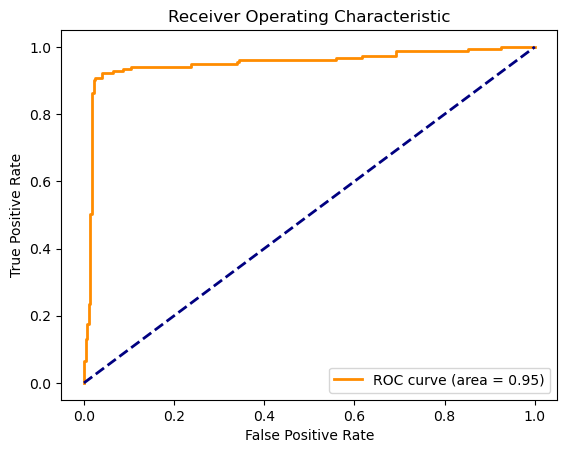

In [184]:
from sklearn.metrics import roc_curve, auc

# Plot ROC Curve
y_pred_prob = best_rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### XGBoost

In [ ]:
from xgboost import XGBClassifier
# Initialize and train the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', eval_metric='error', learning_rate=0.1,
                       n_estimators=140, importance_type='total_gain')

param_grid_xgb = { 
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch1 = GridSearchCV(xgb, param_grid=param_grid_xgb, scoring='accuracy', cv=5) 
gsearch1.fit(X_train, y_train)
best_xgb = gsearch1.best_estimator_
print("Best parameters for XGBoost:")
print(gsearch1.best_params_)

Best parameters for XGBoost:
{'colsample_bytree': 0.7, 'gamma': 0.0, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.7}


In [206]:
print(classification_report(y_test, best_xgb.predict(X_test)))

              precision    recall  f1-score   support

       False       0.93      0.98      0.96       277
        True       0.96      0.88      0.91       153

    accuracy                           0.94       430
   macro avg       0.95      0.93      0.94       430
weighted avg       0.94      0.94      0.94       430



<Figure size 1000x600 with 0 Axes>

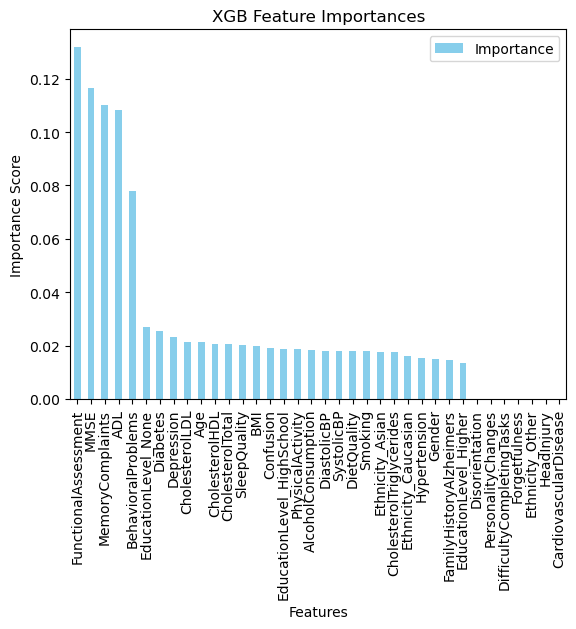

In [213]:
# get feature importances
xgb_importance = pd.DataFrame(best_xgb.feature_importances_, index=X_train.columns, columns=['Importance'])
xgb_importance = xgb_importance.sort_values(by='Importance', ascending=False)
# plot feature importance
plt.figure(figsize=(10, 6))
xgb_importance.plot(kind='bar', color='skyblue')
plt.title('XGB Feature Importances')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.show()

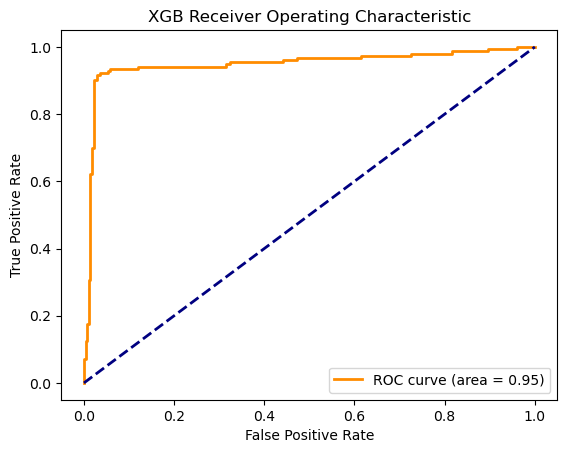

In [218]:
# Plot ROC Curve
y_pred_prob = best_xgb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGB Receiver Operating Characteristic')
plt.legend(loc="lower right")
# plt.grid(True)
plt.show()

## Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define a function to calculate and display metrics
def evaluate_model(y_test, y_pred, y_pred_prob=None, model_name="Model"):
    print(f"Performance Metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(f"Precision: {precision_score(y_test, y_pred):.3f}")
    print(f"Recall: {recall_score(y_test, y_pred):.3f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.3f}")
    if y_pred_prob is not None:
        print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_prob):.3f}")
    print("-" * 40)

# Evaluate Logistic Regression
evaluate_model(y_test, best_logit.predict(X_test), best_logit.predict_proba(X_test)[:, 1], model_name="Logistic Regression")

# Evaluate Random Forest
evaluate_model(y_test, best_rf.predict(X_test), best_rf.predict_proba(X_test)[:, 1], model_name="Random Forest")

# Evaluate XGBoost
evaluate_model(y_test, best_xgb.predict(X_test), best_xgb.predict_proba(X_test)[:, 1], model_name="XGBoost")

Performance Metrics for Logistic Regression:
Accuracy: 0.828
Precision: 0.788
Recall: 0.706
F1-Score: 0.745
ROC-AUC: 0.949
----------------------------------------
Performance Metrics for Random Forest:
Accuracy: 0.912
Precision: 0.960
Recall: 0.784
F1-Score: 0.863
ROC-AUC: 0.951
----------------------------------------
Performance Metrics for XGBoost:
Accuracy: 0.942
Precision: 0.957
Recall: 0.876
F1-Score: 0.915
ROC-AUC: 0.949
----------------------------------------


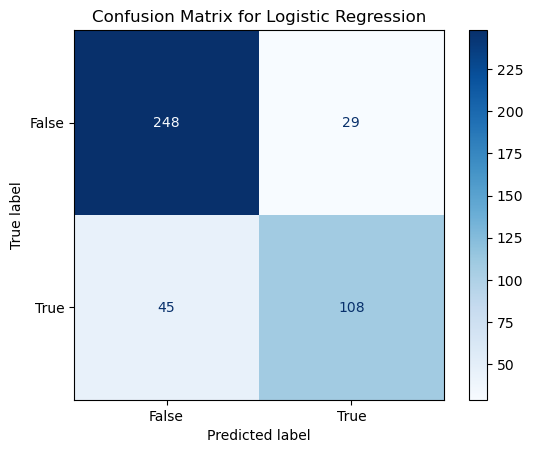

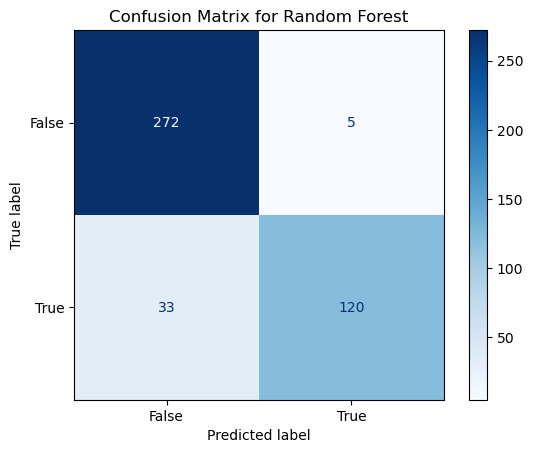

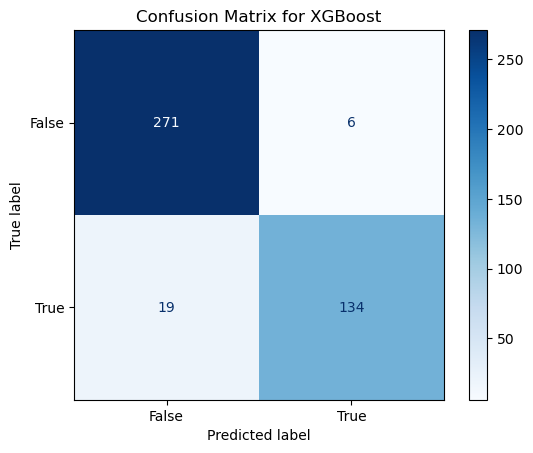

In [225]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Import additional libraries for visualization

# Define a function to display confusion matrices
def plot_confusion_matrix(y_test, y_pred, model_name="Model"):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()  

# Plot confusion matrices for each model
plot_confusion_matrix(y_test, best_logit.predict(X_test), model_name="Logistic Regression")
plot_confusion_matrix(y_test, best_rf.predict(X_test), model_name="Random Forest")
plot_confusion_matrix(y_test, best_xgb.predict(X_test), model_name="XGBoost")

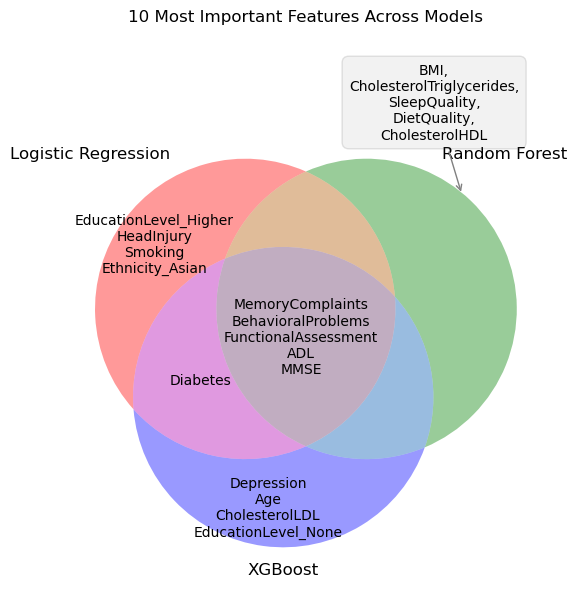

In [260]:
from matplotlib_venn import venn3

# Extract top 10 features for each model
top_features_logit = set(logit_coeff.head(10).index)
top_features_rf = set(feature_importance.head(10).index)
top_features_xgb = set(xgb_importance.head(10).index)

# Create a Venn diagram
plt.figure(figsize=(8, 6))
venn = venn3([top_features_logit, top_features_rf, top_features_xgb],
             ('Logistic Regression', 'Random Forest', 'XGBoost'))
ppp=venn.get_label_by_id('100').set_text('\n'.join(top_features_logit-top_features_rf-top_features_xgb))
venn.get_label_by_id('110').set_text('\n'.join(top_features_logit&top_features_rf-top_features_xgb))
venn.get_label_by_id('011').set_text('\n'.join(top_features_rf&top_features_xgb-top_features_logit))
venn.get_label_by_id('001').set_text('\n'.join(top_features_xgb-top_features_logit-top_features_rf))
venn.get_label_by_id('101').set_text('\n'.join(top_features_logit&top_features_xgb-top_features_rf))
venn.get_label_by_id('111').set_text('\n'.join(top_features_logit&top_features_rf&top_features_xgb))
venn.get_label_by_id('010').set_text('')
plt.annotate(',\n'.join(top_features_rf-top_features_logit-top_features_xgb), xy=venn.get_label_by_id('010').get_position() +
             np.array([0, 0.2]), xytext=(-20,40), ha='center',
             textcoords='offset points', 
             bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->',              
                             connectionstyle='arc',color='gray'))
plt.rcParams['axes.titley'] = 1.2    # y is in axes-relative coordinates.
plt.title('10 Most Important Features Across Models')
plt.show()

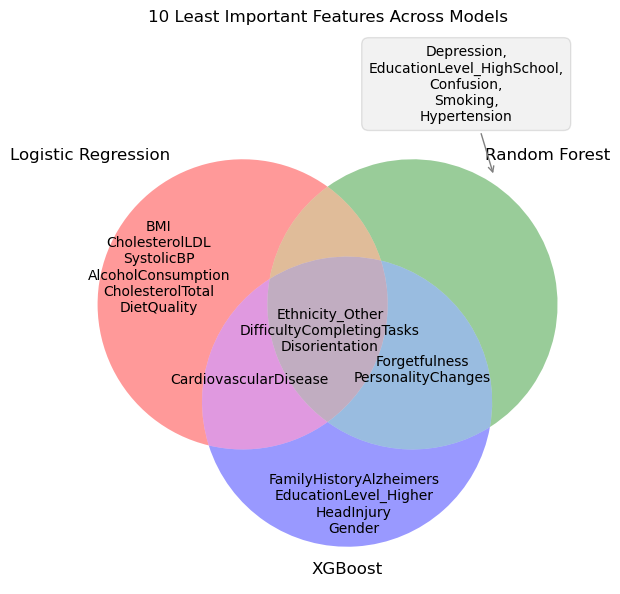

In [261]:
tail_features_logit = set(logit_coeff.tail(10).index)
tail_features_rf = set(feature_importance.tail(10).index)
tail_features_xgb = set(xgb_importance.tail(10).index)

# Create a Venn diagram
plt.figure(figsize=(8, 6))
venn = venn3([tail_features_logit, tail_features_rf, tail_features_xgb],
             ('Logistic Regression', 'Random Forest', 'XGBoost'))
ppp=venn.get_label_by_id('100').set_text('\n'.join(tail_features_logit-tail_features_rf-tail_features_xgb))
venn.get_label_by_id('110').set_text('\n'.join(tail_features_logit&tail_features_rf-tail_features_xgb))
venn.get_label_by_id('011').set_text('\n'.join(tail_features_rf&tail_features_xgb-tail_features_logit))
venn.get_label_by_id('001').set_text('\n'.join(tail_features_xgb-tail_features_logit-tail_features_rf))
venn.get_label_by_id('101').set_text('\n'.join(tail_features_logit&tail_features_xgb-tail_features_rf))
venn.get_label_by_id('111').set_text('\n'.join(tail_features_logit&tail_features_rf&tail_features_xgb))
venn.get_label_by_id('010').set_text('')
plt.annotate(',\n'.join(tail_features_rf-tail_features_logit-tail_features_xgb), xy=venn.get_label_by_id('010').get_position() +
             np.array([0, 0.2]), xytext=(-20,40), ha='center',
             textcoords='offset points', 
             bbox=dict(boxstyle='round,pad=0.5', fc='gray', alpha=0.1),
             arrowprops=dict(arrowstyle='->',              
                             connectionstyle='arc',color='gray'))

plt.rcParams['axes.titley'] = 1.2 
plt.title('10 Least Important Features Across Models')
plt.show()

In [ ]:
# Get the union of top 10 most important features from each model
union_top_features = top_features_logit.union(top_features_rf).union(top_features_xgb)

# Filter the dataset to include only the selected features
X_train_union = X_train[list(union_top_features)]
X_test_union = X_test[list(union_top_features)]

# Initialize and train the XGBoost classifier
xgb_union = XGBClassifier(objective='binary:logistic', eval_metric='error', learning_rate=0.1, 
                          n_estimators=140, colsample_bytree=0.7, max_depth=3, min_child_weight=5,
                          subsample=0.7)
xgb_union.fit(X_train_union, y_train)

# Evaluate the model
y_pred_union = xgb_union.predict(X_test_union)
y_pred_prob_union = xgb_union.predict_proba(X_test_union)[:, 1]

# Print classification report
print("Classification Report for XGBoost with Union of Top Features:")
print(classification_report(y_test, y_pred_union, digits=3))

# Calculate and display ROC-AUC
roc_auc_union = roc_auc_score(y_test, y_pred_prob_union)
print(f"ROC-AUC: {roc_auc_union:.3f}")

Classification Report for XGBoost with Union of Top Features:
              precision    recall  f1-score   support

       False      0.941     0.978     0.959       277
        True      0.958     0.889     0.922       153

    accuracy                          0.947       430
   macro avg      0.949     0.934     0.941       430
weighted avg      0.947     0.947     0.946       430

ROC-AUC: 0.952


In [ ]:
ls = []
for i in range(10, 0, -1):
    union_top_features = logit_coeff.head(i).index.union(feature_importance.head(i).index).union(xgb_importance.head(i).index)
    X_train_union = X_train[list(union_top_features)]
    X_test_union = X_test[list(union_top_features)]
    xgb_union = XGBClassifier(objective='binary:logistic', eval_metric='error', learning_rate=0.1, 
                          n_estimators=140, colsample_bytree=0.7, max_depth=3, min_child_weight=5,
                          subsample=0.7)
    xgb_union.fit(X_train_union, y_train)
    y_pred_union = xgb_union.predict(X_test_union)
    y_pred_prob_union = xgb_union.predict_proba(X_test_union)[:, 1]
    # Compute accuracy, recall, precision, and F1-score
    number_of_features = len(union_top_features)
    accuracy = accuracy_score(y_test, y_pred_union)
    recall = recall_score(y_test, y_pred_union)
    precision = precision_score(y_test, y_pred_union)
    fscore = f1_score(y_test, y_pred_union)
    roc_auc_union = roc_auc_score(y_test, y_pred_prob_union)
    ls.append([number_of_features, accuracy, recall, precision, fscore, roc_auc_union])

[[19, 0.9418604651162791, 0.8758169934640523, 0.9571428571428572, 0.9146757679180887, 0.9538354451287134], [17, 0.9511627906976744, 0.9019607843137255, 0.9583333333333334, 0.9292929292929293, 0.9534697152025672], [14, 0.9488372093023256, 0.8954248366013072, 0.958041958041958, 0.9256756756756757, 0.9518180316651329], [11, 0.9488372093023256, 0.8954248366013072, 0.958041958041958, 0.9256756756756757, 0.9520067954979826], [8, 0.9511627906976744, 0.9019607843137255, 0.9583333333333334, 0.9292929292929293, 0.9517708407069206], [5, 0.9511627906976744, 0.9084967320261438, 0.952054794520548, 0.9297658862876256, 0.9532809513697177], [5, 0.9511627906976744, 0.9084967320261438, 0.952054794520548, 0.9297658862876256, 0.9532809513697177], [5, 0.9511627906976744, 0.9084967320261438, 0.952054794520548, 0.9297658862876256, 0.9532809513697177], [5, 0.9511627906976744, 0.9084967320261438, 0.952054794520548, 0.9297658862876256, 0.9532809513697177], [2, 0.686046511627907, 0.38562091503267976, 0.59, 0.4664

<Figure size 1000x600 with 0 Axes>

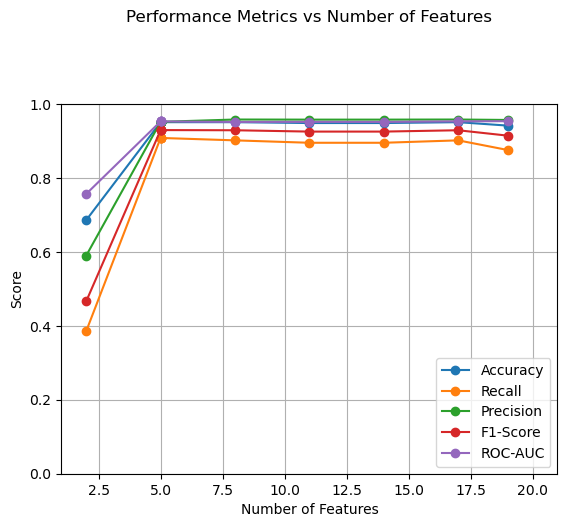

In [279]:
plt.figure(figsize=(10, 6))
df = pd.DataFrame(ls, columns=['Number of Features', 'Accuracy', 'Recall', 'Precision', 'F1-Score', 'ROC-AUC'])
df.set_index('Number of Features').plot(marker='o')
plt.title('Performance Metrics vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Score')
plt.grid(which='major')
plt.axis([1, 21, 0, 1])
plt.legend(loc='lower right')
plt.show()

In [291]:
print(df)

   Number of Features  Accuracy    Recall  Precision  F1-Score   ROC-AUC
0                  19  0.941860  0.875817   0.957143  0.914676  0.953835
1                  17  0.951163  0.901961   0.958333  0.929293  0.953470
2                  14  0.948837  0.895425   0.958042  0.925676  0.951818
3                  11  0.948837  0.895425   0.958042  0.925676  0.952007
4                   8  0.951163  0.901961   0.958333  0.929293  0.951771
5                   5  0.951163  0.908497   0.952055  0.929766  0.953281
6                   5  0.951163  0.908497   0.952055  0.929766  0.953281
7                   5  0.951163  0.908497   0.952055  0.929766  0.953281
8                   5  0.951163  0.908497   0.952055  0.929766  0.953281
9                   2  0.686047  0.385621   0.590000  0.466403  0.756967


In [287]:
top2features = [*logit_coeff.head(2).index.union(feature_importance.head(2).index).union(xgb_importance.head(2).index)]
top2features

['ADL',
 'BehavioralProblems',
 'FunctionalAssessment',
 'MMSE',
 'MemoryComplaints']

This match the 5 most important features in XGBoost and Random Forest.

In [ ]:
from sklearn.feature_selection import RFE

# Initialize the logistic regression model
select_clf = XGBClassifier(objective='binary:logistic', eval_metric='error', learning_rate=0.1, 
                          n_estimators=140, colsample_bytree=0.7, max_depth=3, min_child_weight=5,
                          subsample=0.7)

# Perform Recursive Feature Elimination (RFE)
rfe = RFE(estimator=select_clf, n_features_to_select=1)
rfe.fit(X_train[top2features], y_train)

# Get the ranking of features
ranking = pd.DataFrame({'Feature': top2features, 'Ranking': rfe.ranking_}).sort_values(by='Ranking')
print("Feature Rankings:")
print(ranking)

Feature Rankings:
                Feature  Ranking
4      MemoryComplaints        1
1    BehavioralProblems        2
2  FunctionalAssessment        3
3                  MMSE        4
0                   ADL        5


<Figure size 1000x600 with 0 Axes>

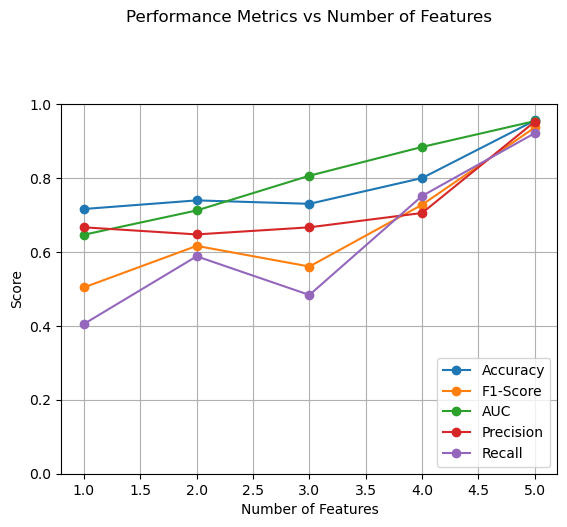

In [ ]:
# Initialize lists to store metrics
metrics = {'Number of Features': [], 'Accuracy': [], 'F1-Score': [], 'AUC': [], 'Precision': [], 'Recall': []}

# Iterate through 1 to 5 features
for i in range(1, 6):
    # Select the top i features
    selected_features = ranking['Feature'].head(i).values
    X_train_selected = X_train[list(selected_features)]
    X_test_selected = X_test[list(selected_features)]
    
    # Train the model using the selected features
    model = XGBClassifier(objective='binary:logistic', eval_metric='error', learning_rate=0.1, 
                          n_estimators=140, colsample_bytree=0.7, max_depth=3, min_child_weight=5,
                          subsample=0.7)
    model.fit(X_train_selected, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_selected)
    y_pred_prob = model.predict_proba(X_test_selected)[:, 1]
    
    # Calculate metrics
    metrics['Number of Features'].append(i)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['F1-Score'].append(f1_score(y_test, y_pred))
    metrics['AUC'].append(roc_auc_score(y_test, y_pred_prob))
    metrics['Precision'].append(precision_score(y_test, y_pred))
    metrics['Recall'].append(recall_score(y_test, y_pred))

# Convert metrics to a DataFrame for easier plotting
metrics_df = pd.DataFrame(metrics)

# Plot the metrics
plt.figure(figsize=(10, 6))
metrics_df.set_index('Number of Features').plot(marker='o')
plt.title('Performance Metrics vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Score')
plt.grid(which='major')
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()

### Use these 5 features to train a new model

In [ ]:
# Train Logistic Regression on top 5 features
X_train_top5 = X_train[top2features]
X_test_top5 = X_test[top2features]
logit_top5 = LogisticRegression()

param_grid = [    
    {'penalty' : ['l2'],
    'C' : np.logspace(-2, 3, 1000),
    'solver' : ['lbfgs'],
    'max_iter' : [100, 1000, 2500, 5000]
    }
]

clf = GridSearchCV(logit_top5, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1, scoring='accuracy')
clf.fit(X_train_top5, y_train)
best_logit_top5 = clf.best_estimator_
best_params = clf.best_params_
print("Best parameters for Logistic Regression:")
print(best_params)

Fitting 5 folds for each of 4000 candidates, totalling 20000 fits
Best parameters for Logistic Regression:
{'C': 0.32848573660300434, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [301]:
evaluate_model(y_test, best_logit_top5.predict(X_test_top5), best_logit_top5.predict_proba(X_test_top5)[:, 1], model_name="Logistic Regression")

Performance Metrics for Logistic Regression:
Accuracy: 0.837
Precision: 0.803
Recall: 0.719
F1-Score: 0.759
ROC-AUC: 0.900
----------------------------------------


In [ ]:
# Random Forest
rf_top5 = RandomForestClassifier()
# grid search for hyperparameter tuning
param_grid = {
    'n_estimators': np.arange(10, 200, 10),
    'max_depth': [None, 10, 15, 20, 25, 30],
    'min_samples_split': np.arange(5, 50, 10)
}
grid_search = GridSearchCV(rf_top5, param_grid, cv=5, scoring='accuracy', n_jobs=-1)    
grid_search.fit(X_train_top5, y_train)
best_rf_top5 = grid_search.best_estimator_
print("Best parameters for Random Forest:")
print(grid_search.best_params_)

Best parameters for Random Forest:
{'max_depth': 25, 'min_samples_split': 35, 'n_estimators': 70}


In [304]:
evaluate_model(y_test, best_rf_top5.predict(X_test_top5), best_rf_top5.predict_proba(X_test_top5)[:, 1], model_name="Random Forest")

Performance Metrics for Random Forest:
Accuracy: 0.958
Precision: 0.966
Recall: 0.915
F1-Score: 0.940
ROC-AUC: 0.953
----------------------------------------


In [ ]:
xgb_top5 = XGBClassifier(objective='binary:logistic', eval_metric='error', learning_rate=0.1,
                       n_estimators=140, importance_type='total_gain')

param_grid_xgb = { 
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)]
}
grid_search = GridSearchCV(xgb_top5, param_grid=param_grid_xgb, scoring='accuracy', cv=5) 
grid_search.fit(X_train_top5, y_train)
best_xgb_top5 = grid_search.best_estimator_
print("Best parameters for XGBoost:")
print(grid_search.best_params_)

Best parameters for XGBoost:
{'colsample_bytree': 0.6, 'gamma': 0.4, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.8}


In [307]:
evaluate_model(y_test, best_xgb_top5.predict(X_test_top5), best_xgb_top5.predict_proba(X_test_top5)[:, 1], model_name="XGBoost")

Performance Metrics for XGBoost:
Accuracy: 0.953
Precision: 0.952
Recall: 0.915
F1-Score: 0.933
ROC-AUC: 0.953
----------------------------------------


In [ ]:
from sklearn.ensemble import StackingClassifier

# Define the base models
estimators = [
    ('logistic', LogisticRegression(C=best_logit_top5.C)),
    ('random_forest', RandomForestClassifier(max_depth=best_rf_top5.max_depth, 
    n_estimators=best_rf_top5.n_estimators, min_samples_split=best_rf_top5.min_samples_split)),
    ('xgboost', XGBClassifier(objective='binary:logistic', eval_metric=['error'], learning_rate=0.1,
    n_estimators=140, importance_type='total_gain', max_depth=3,
    min_child_weight=5, subsample=0.8, colsample_bytree=0.6, gamma=0.4))
]

# Create the stacking classifier
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5,
    n_jobs=-1
)

# Train the stacking model
stacking_model.fit(X_train_top5, y_train)

# Evaluate the stacking model
evaluate_model(y_test, stacking_model.predict(X_test_top5), stacking_model.predict_proba(X_test_top5)[:, 1], model_name="Stacking Model")

Performance Metrics for Stacking Model:
Accuracy: 0.956
Precision: 0.959
Recall: 0.915
F1-Score: 0.936
ROC-AUC: 0.955
----------------------------------------
